In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams["font.family"] = "Verdana"

In [2]:
def plot_performance_metrics_from_csv(directory):
    # Get all the CSV files in the directory
    csv_files = [f for f in os.listdir(directory) if f.endswith('.csv')]

    # Initialize the plot
    plt.figure(figsize=(9, 5))

    # Read each CSV and plot the data
    for csv_file in csv_files:
        file_path = os.path.join(directory, csv_file)
        df = pd.read_csv(file_path)

        # Sort data by 'Step' to ensure the line is continuous and makes sense
        df = df.sort_values(by='Step')

        # Removing the .csv suffix for the legend
        label_name = csv_file.rsplit('.', 1)[0]

        plt.plot(df['Step'], df['Value'], label=label_name)

                # Annotate max value
        max_val = df['Value'].max()
        max_step = df[df['Value'] == max_val]['Step'].values[0]
        plt.annotate(f'{max_val:.2f}', (max_step, max_val), textcoords="offset points", xytext=(0,5), ha='center', fontsize=9)

    # Set plot labels, legend, title, and show the plot
    plt.xlabel('Step')
    plt.ylabel('Inverse Average Bounded Slowdown')
    plt.legend()
    plt.title('HPC2N Validation Performance Log')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

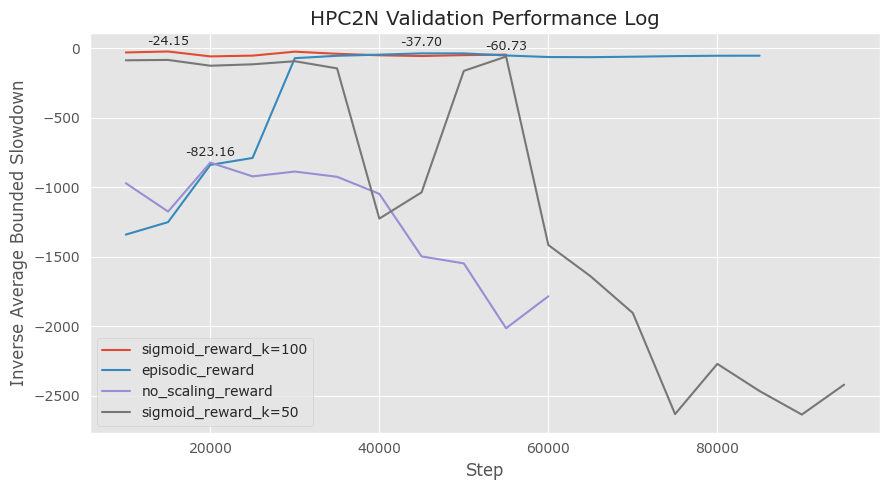

In [3]:
# Usage
directory_path = "./csv_logs/stage-1/performance-metric"  # Replace with your directory path
plot_performance_metrics_from_csv(directory_path)

In [4]:
def smooth(scalars, weight = 0.5):  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value

    return smoothed

def plot_explained_variance_from_csv(directory):
    # Get all the CSV files in the directory
    csv_files = [f for f in os.listdir(directory) if f.endswith('.csv')]

    # Initialize the plot
    plt.figure(figsize=(9, 5))

    # Read each CSV and plot the data
    for csv_file in csv_files:
        file_path = os.path.join(directory, csv_file)
        df = pd.read_csv(file_path)

        # Sort data by 'Step' to ensure the line is continuous and makes sense
        df = df.sort_values(by='Step')

        # Removing the .csv suffix for the legend
        label_name = csv_file.rsplit('.', 1)[0]

        plt.plot(df['Step'], df['Value'], label=label_name, alpha=0.8)

        # Plot the smoothed data
        smoothed_values = smooth(df['Value'], weight=0.5)
        plt.plot(df['Step'], smoothed_values, label=f"{label_name} 0.5-exponential MA", alpha=0.3)

                # Annotate max value
        max_val = df['Value'].max()
        max_step = df[df['Value'] == max_val]['Step'].values[0]
        plt.annotate(f'{max_val:.2f}', (max_step, max_val), textcoords="offset points", xytext=(0,5), ha='center', fontsize=9)

    # Set plot labels, legend, title, and show the plot
    plt.xlabel('Step')
    plt.ylabel('Explained Variance')
    plt.legend()
    plt.title('HPC2N Training Explained Variance Log')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

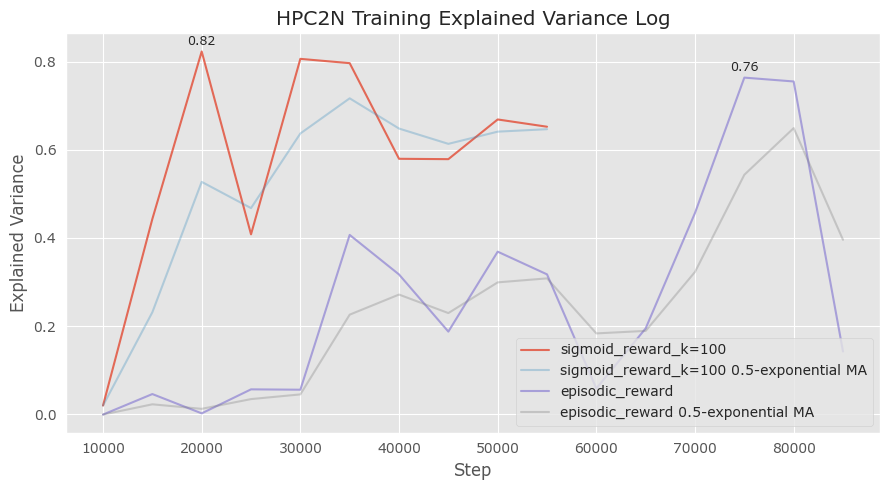

In [5]:
# Usage
directory_path = "./csv_logs/stage-1/explained_variance"
plot_explained_variance_from_csv(directory_path)

In [6]:
def plot_value_loss_from_csv(directory):
    # Get all the CSV files in the directory
    csv_files = [f for f in os.listdir(directory) if f.endswith('.csv')]
    name = directory_path.rsplit('/')[-1]

    # Initialize the plot
    plt.figure(figsize=(9, 5))

    # Read each CSV and plot the data
    for csv_file in csv_files:
        file_path = os.path.join(directory, csv_file)
        df = pd.read_csv(file_path)

        # Sort data by 'Step' to ensure the line is continuous and makes sense
        df = df.sort_values(by='Step')

        # Removing the .csv suffix for the legend
        label_name = csv_file.rsplit('.', 1)[0]

        plt.plot(df['Step'], df['Value'], label=label_name)

    # Set plot labels, legend, title, and show the plot
    plt.xlabel('Step')
    plt.ylabel('Value Network Loss')
    plt.legend()
    plt.title(name)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

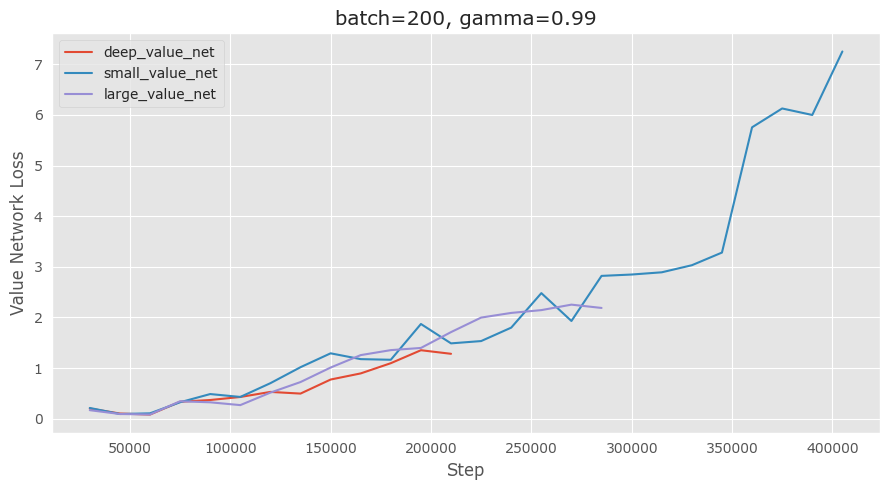

In [7]:
directory_path = "./csv_logs/stage-2/batch=200, gamma=0.99"
plot_value_loss_from_csv(directory_path)

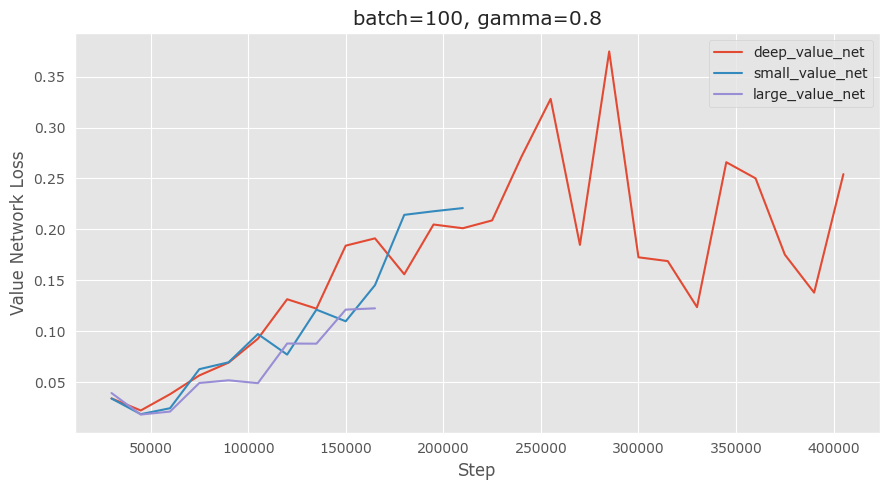

In [8]:
directory_path = "./csv_logs/stage-2/batch=100, gamma=0.8"
plot_value_loss_from_csv(directory_path)

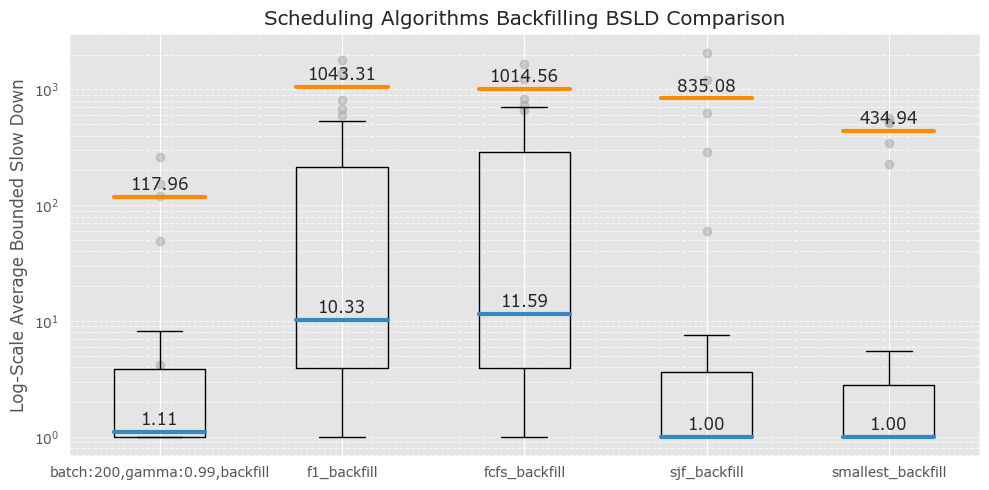

In [9]:
import numpy as np

directory = './csv_logs/stage-3/bsld/3'

file_names = sorted([f for f in os.listdir(directory) if f.endswith('.csv')])
data = [pd.read_csv(os.path.join(directory, f), header=None).iloc[:, 0] for f in file_names]


base_names = [os.path.splitext(f)[0] for f in file_names]
plt.figure(figsize=(10, 5))

for i in range(len(file_names)):
    for j in range(0, 50000, 10000):
        iter_sum = np.mean(data[i][j:j+10000])
        plt.plot(i+1, iter_sum ,'o', color='darkgrey', alpha=0.5)


    mean_var = np.mean(data[i])
    median_var = np.median(data[i])

    plt.annotate(f'{mean_var:.2f}', (i+1, mean_var), textcoords="offset points", xytext=(0,5), ha='center',fontsize=12)


    plt.annotate(f'{median_var:.2f}', (i+1, median_var), textcoords="offset points", xytext=(0,5), ha='center',fontsize=12)



plt.boxplot(data,
            showfliers=False,
            meanline=True,
            showmeans=True,
            manage_ticks=True,
            medianprops={"linewidth": 3},
            meanprops={"color": "darkorange", "linewidth": 3, "linestyle": "solid"})
# plt.ylim([0, 50])
plt.xticks(range(1, len(base_names) + 1), base_names)
plt.title("Scheduling Algorithms Backfilling BSLD Comparison")
plt.ylabel("Log-Scale Average Bounded Slow Down")
plt.yscale('log')
plt.grid(axis='y', linestyle='--', which='both', alpha=0.7)

plt.tight_layout()
plt.show()

9500
772
0
25236
26200


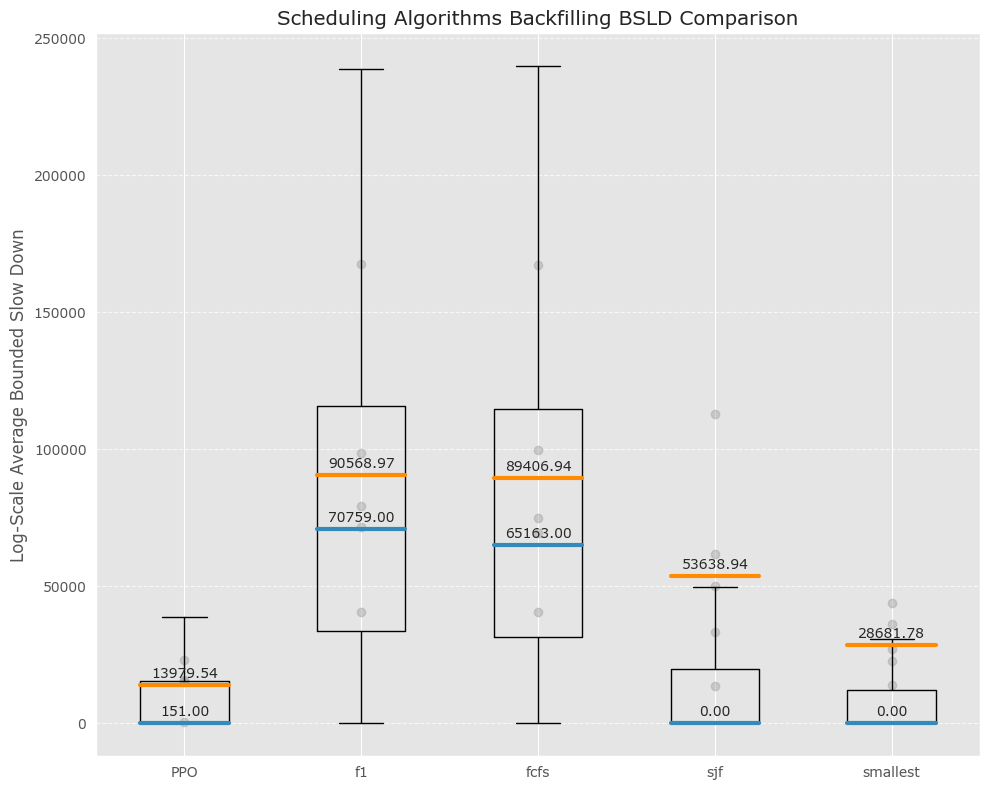

In [10]:
import numpy as np

directory = './csv_logs/stage-3/wait_time'

file_names = sorted([f for f in os.listdir(directory) if f.endswith('.csv')])
data = [pd.read_csv(os.path.join(directory, f), header=None).iloc[:, 0] for f in file_names]


base_names = [os.path.splitext(f)[0] for f in file_names]
plt.figure(figsize=(10, 8))

for i in range(len(file_names)):
    for j in range(0, 50000, 10000):
        data_ = data[i][j:j+10000]

        iter_sum = np.mean(data[i][j:j+10000])

        plt.plot(i+1, iter_sum ,'o', color='darkgrey', alpha=0.5)

    mean_var = np.mean(data[i])
    median_var = np.median(data[i])

    print(data[i].value_counts().get(0, 0))

    plt.annotate(f'{mean_var:.2f}', (i+1, mean_var), textcoords="offset points", xytext=(0,5), ha='center',fontsize=10)


    plt.annotate(f'{median_var:.2f}', (i+1, median_var), textcoords="offset points", xytext=(0,5), ha='center',fontsize=10)



plt.boxplot(data,
            showfliers=False,
            meanline=True,
            showmeans=True,
            manage_ticks=True,
            medianprops={"linewidth": 3},
            meanprops={"color": "darkorange", "linewidth": 3, "linestyle": "solid"})
# plt.ylim([0, 50])
plt.xticks(range(1, len(base_names) + 1), base_names)
plt.title("Scheduling Algorithms Backfilling BSLD Comparison")
plt.ylabel("Log-Scale Average Bounded Slow Down")
# plt.yscale('log')
# plt.ylim([0, 10e6])
plt.grid(axis='y', linestyle='--', which='both', alpha=0.7)

plt.tight_layout()
plt.show()

In [11]:
def plot_performance_from_csv(directory):
    # Get all the CSV files in the directory
    csv_files = [f for f in os.listdir(directory) if f.endswith('.csv')]
    name = "SDSC-BLUE Reward Functions Experiment Validation Performance Score"

    # Initialize the plot
    plt.figure(figsize=(9, 5))

    # Read each CSV and plot the data
    for csv_file in csv_files:
        file_path = os.path.join(directory, csv_file)
        df = pd.read_csv(file_path)

        # Sort data by 'Step' to ensure the line is continuous and makes sense
        df = df.sort_values(by='Step')

        # Removing the .csv suffix for the legend
        label_name = csv_file.rsplit('.', 1)[0]

        plt.plot(df['Step'], df['Value'], label=label_name)

    # Set plot labels, legend, title, and show the plot
    plt.xlabel('Step')
    plt.ylabel('Average Inverse Bounded Slowdown')
    plt.legend()
    plt.title(name)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

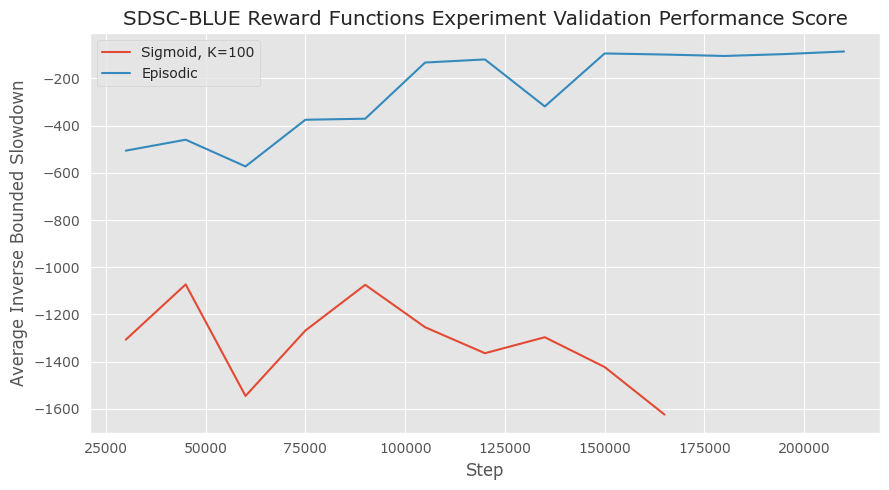

In [12]:
directory_path = "./csv_logs/stage-4/reward"
plot_performance_from_csv(directory_path)

0
0
0
0
0


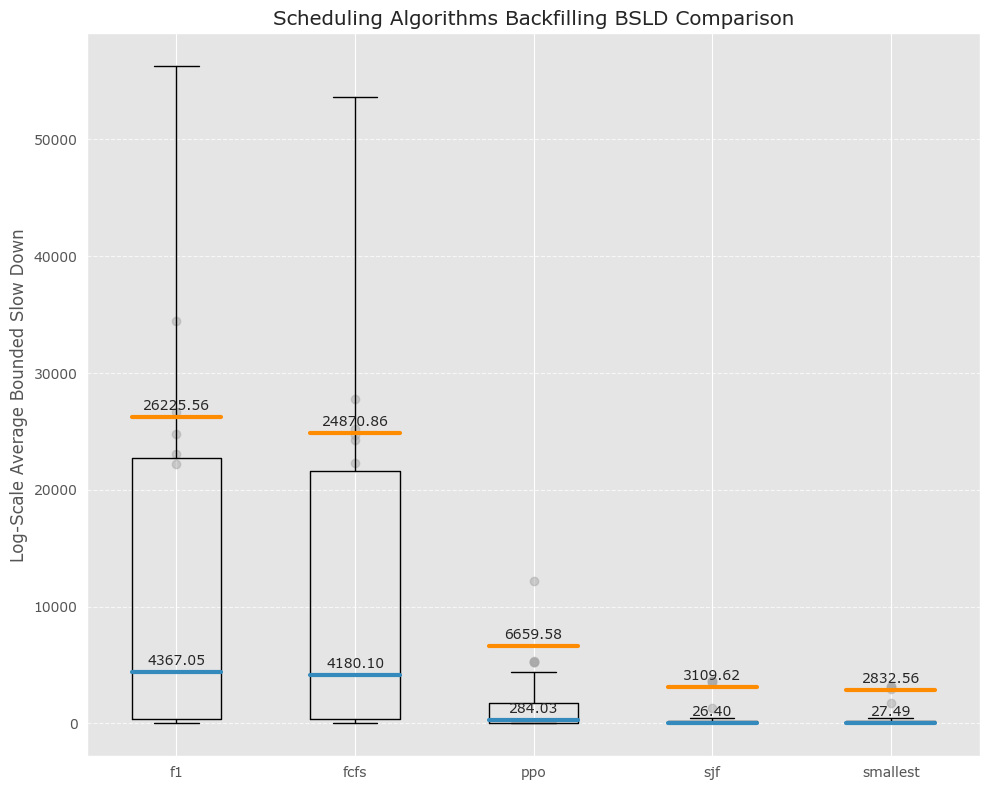

In [18]:
import numpy as np

directory = './csv_logs/stage-4/SDSC-SP2'

file_names = sorted([f for f in os.listdir(directory) if f.endswith('.csv')])
data = [pd.read_csv(os.path.join(directory, f), header=None).iloc[:, 0] for f in file_names]


base_names = [os.path.splitext(f)[0] for f in file_names]
plt.figure(figsize=(10, 8))

for i in range(len(file_names)):
    for j in range(0, 50000, 10000):
        data_ = data[i][j:j+10000]

        iter_sum = np.mean(data[i][j:j+10000])

        plt.plot(i+1, iter_sum ,'o', color='darkgrey', alpha=0.5)

    mean_var = np.mean(data[i])
    median_var = np.median(data[i])

    # print(data[i].value_counts().get(0, 0))

    plt.annotate(f'{mean_var:.2f}', (i+1, mean_var), textcoords="offset points", xytext=(0,5), ha='center',fontsize=10)


    plt.annotate(f'{median_var:.2f}', (i+1, median_var), textcoords="offset points", xytext=(0,5), ha='center',fontsize=10)



plt.boxplot(data,
            showfliers=False,
            meanline=True,
            showmeans=True,
            manage_ticks=True,
            medianprops={"linewidth": 3},
            meanprops={"color": "darkorange", "linewidth": 3, "linestyle": "solid"})
# plt.ylim([0, 50])
plt.xticks(range(1, len(base_names) + 1), base_names)
plt.title("Scheduling Algorithms Backfilling BSLD Comparison")
plt.ylabel("Log-Scale Average Bounded Slow Down")
# plt.yscale('log')
# plt.ylim([0, 10e6])
plt.grid(axis='y', linestyle='--', which='both', alpha=0.7)

plt.tight_layout()
plt.show()